In [81]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
binned_dir='/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/binned'
results_dir='/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_1D/nsdsyn'
fig_dir='/Volumes/server/Projects/sfp_nsd/derivatives/figures/sfp_model/results_1D/nsdsyn'

In [86]:
e1, e2 = 0.5, 4
enum = 7
vs='pRFcenter'
lr = 0.005
max_epoch = 8000
roi = 'V1'
stim_type_list = ['forward-spiral', 'reverse-spiral', 'annulus', 'pinwheel']
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]

# Loss and model history

In [90]:
args = ['class','lr','eph','dset','sub','roi']

In [87]:
f = []
for stim_type, subj in itertools.product(stim_type_list, subj_list):
    file_name = f'loss-history_class-{stim_type}_lr-{lr}_eph-{max_epoch}_binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-{vs}.h5'
    f.append(os.path.join(results_dir, file_name))
df = tuning.load_history_files(f, *args)

In [111]:
df

,ecc_bin,epoch,loss,names,lr_rate,max_epoch,dset,sub,vroinames
0,0.5-1.0 deg,0,3.982837,forward spiral,0.005,8000,nsdsyn,subj01,V1
1,0.5-1.0 deg,1,3.975104,forward spiral,0.005,8000,nsdsyn,subj01,V1
2,0.5-1.0 deg,2,3.967232,forward spiral,0.005,8000,nsdsyn,subj01,V1
3,0.5-1.0 deg,3,3.959220,forward spiral,0.005,8000,nsdsyn,subj01,V1
4,0.5-1.0 deg,4,3.951068,forward spiral,0.005,8000,nsdsyn,subj01,V1
...,...,...,...,...,...,...,...,...,...
55995,3.5-4.0 deg,7995,0.032791,pinwheel,0.005,8000,nsdsyn,subj08,V1
55996,3.5-4.0 deg,7996,0.032791,pinwheel,0.005,8000,nsdsyn,subj08,V1
55997,3.5-4.0 deg,7997,0.032791,pinwheel,0.005,8000,nsdsyn,subj08,V1
55998,3.5-4.0 deg,7998,0.032791,pinwheel,0.005,8000,nsdsyn,subj08,V1


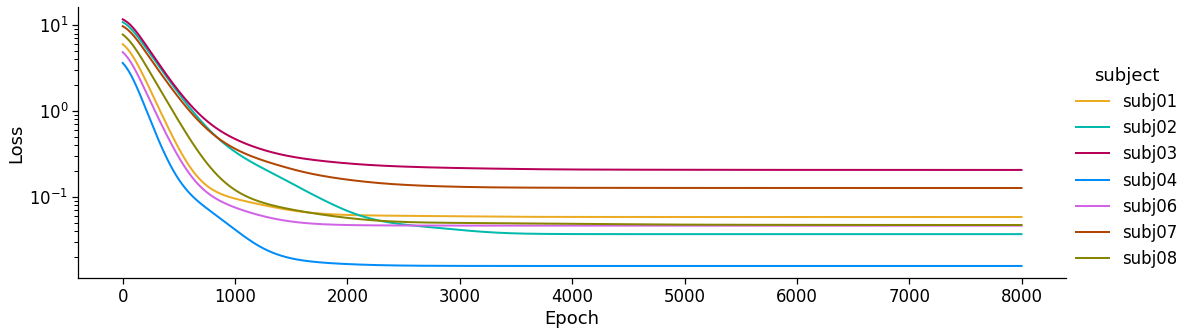

In [118]:
ww = df.query('sub != "subj05"')
pal = utils.subject_color_palettes('nsdsyn', ww['sub'].unique())
vis.plot_loss_history(ww, hue='sub',
                      lgd_title='subject',
                      log_y=True,
                      palette=pal)

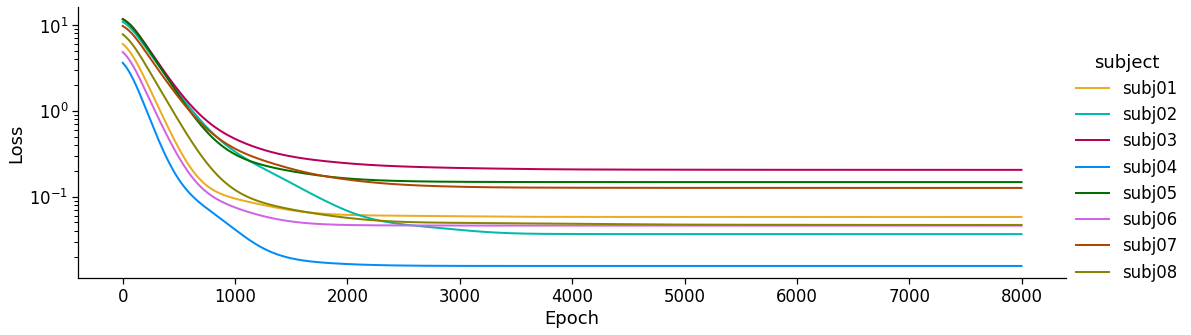

In [119]:
ww = df
pal = utils.subject_color_palettes('nsdsyn', ww['sub'].unique())
vis.plot_loss_history(ww, hue='sub',
                      lgd_title='subject',
                      log_y=True,
                      palette=pal)

In [91]:
f = []
for stim_type, subj in itertools.product(stim_type_list, subj_list):
    file_name = f'model-history_class-{stim_type}_lr-{lr}_eph-{max_epoch}_binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-{vs}.h5'
    f.append(os.path.join(results_dir, file_name))
model_df = tuning.load_history_files(f, *args)

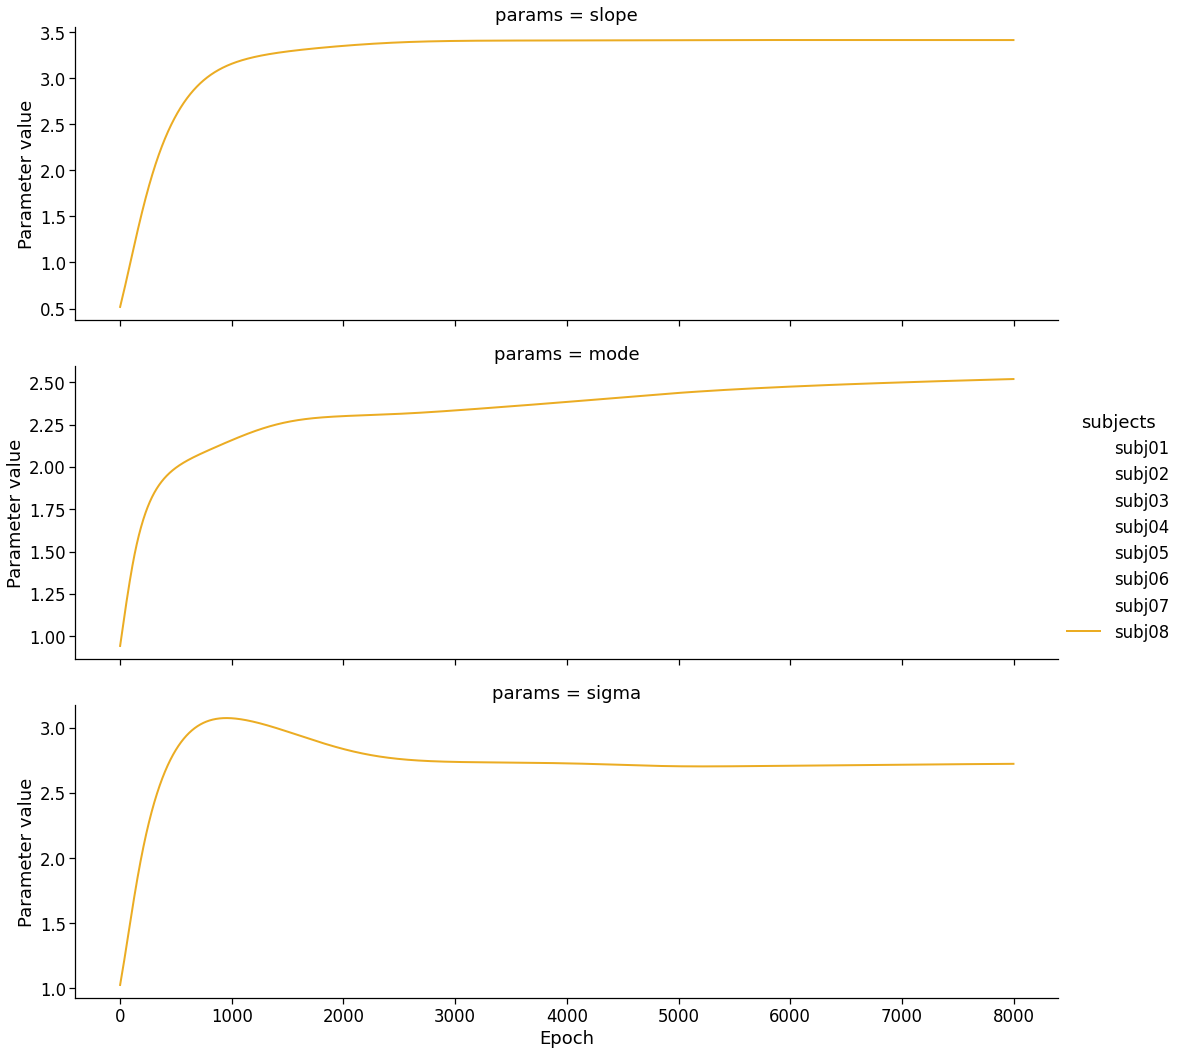

In [101]:
vis.plot_param_history(model_df, ['slope','mode','sigma'], [1,2,3],
                       hue='sub', hue_order=subj_list, lgd_title='subjects')

# Preferred period

In [74]:
file_name = os.path.join(binned_dir, f'binned-ecc-{e1}-{e2}_nbin-{enum}_dset-nsdsyn_sub-{subj}_roi-{roi}_vs-{vs}.csv')
subj_df = pd.read_csv(file_name)

In [83]:
vis1D.plot_curves(subj_df, model_df.query('epoch == @max_epoch-1'))

AttributeError: module 'sfp_nsdsyn.visualization.plot_1D_model_results' has no attribute 'plot_curves'

# Broderick dataset comparison